## learn to use/work with pandas and numpy

In [124]:
import pandas as pd
import numpy as np
#mod max row display count
pd.set_option('display.max_rows', 1000)

In [125]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### subset dataframe

In [126]:
# make subset of data where smoker = no and total_bill gt= $10

#break each condition into sep. statements--affords more flexibility

cond_1 = (tips['smoker'] == 'No') 
cond_2 = (tips['total_bill'] >= 10)
cond_3 = (tips['sex'] == 'Female')

In [127]:
# condition:  tips.loc[(tips['smoker'] == 'No') & (tips['total_bill'] > 10)]

(tips[cond_1 
         & cond_2
         #& cond_3
     ]).head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [128]:
type(tips['total_bill'])

pandas.core.series.Series

#### groupby function 

In [129]:
# avg total bill for each value of smoker, day, and time

exercise_2 = tips.groupby(['smoker','day','time'])['total_bill'].mean().reset_index
exercise_2
#exercise_2.replace(np.nan, 0)

<bound method Series.reset_index of smoker  day   time  
Yes     Thur  Lunch     19.190588
              Dinner          NaN
        Fri   Lunch     12.323333
              Dinner    19.806667
        Sat   Lunch           NaN
              Dinner    21.276667
        Sun   Lunch           NaN
              Dinner    24.120000
No      Thur  Lunch     17.075227
              Dinner    18.780000
        Fri   Lunch     15.980000
              Dinner    19.233333
        Sat   Lunch           NaN
              Dinner    19.661778
        Sun   Lunch           NaN
              Dinner    20.506667
Name: total_bill, dtype: float64>

In [130]:
tips.groupby([cond_1]).mean('total_bill')

,total_bill,tip,size
smoker,,,
False,20.756344,3.008710,2.408602
True,19.188278,2.991854,2.668874


In [131]:
len(tips)

244

In [132]:
#quick panda version check...

pd.__version__

'1.1.5'

#### tidy data -- reshape data for analysis

In [133]:
pew = pd.read_csv('data/pew.csv')

In [134]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


#### melt:  transform dataframe from long to wide
##### create 1 col w/ all income brackets

In [135]:
pew.melt(id_vars='religion').head()

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [136]:
pew_tidy = pew.melt(id_vars='religion', var_name = 'income', value_name = 'count')

In [137]:
pew_tidy.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


##### wide --> long:  create 1 col w/ all week values

In [138]:
billboard = pd.read_csv('data/billboard.csv')

In [139]:
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
billboard.melt(id_vars=['year','artist','track','time','date.entered'],
              value_name = 'rank', 
              var_name = 'week').head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [141]:
(billboard
    .melt(id_vars=['year','artist','track','time','date.entered'],
        value_name = 'rank', 
        var_name = 'week')
     .groupby('artist')['rank']
     .mean().head()
)

artist
2 Pac           85.428571
2Ge+her         90.000000
3 Doors Down    37.602740
504 Boyz        56.222222
98^0            37.650000
Name: rank, dtype: float64

In [142]:
(billboard
    .melt(id_vars=['year','artist','track','time','date.entered'],
        value_name = 'rank', 
        var_name = 'week')
     .groupby('artist')['rank']
     .mean().head()
)

artist
2 Pac           85.428571
2Ge+her         90.000000
3 Doors Down    37.602740
504 Boyz        56.222222
98^0            37.650000
Name: rank, dtype: float64

In [143]:
ebola = pd.read_csv('data/country_timeseries.csv')

In [144]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [145]:
ebola_long = ebola.melt(id_vars = ['Date','Day'],
        var_name = 'cd_country',
        value_name = 'count'
                       )

In [146]:
ebola_long.head()

,Date,Day,cd_country,count
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


#### split column that contains 2 bits of discrete info in the same cell into sep. columns
##### based on delimiter...

In [147]:
ebola_split = ebola_long['cd_country'].str.split('_', expand = True)

In [148]:
ebola_long[['status', 'country']] = ebola_split

In [149]:
ebola_long.head()

,Date,Day,cd_country,count,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [150]:
weather = pd.read_csv('data/weather.csv')

#### (1) 'melt:'  transform days from mult. lines to 1 col and (2) 'pivot_table:'  bifurcate 'element' col into 2 sep. columns

In [151]:
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
weather_long = weather.melt(id_vars = ['id', 'year', 'month', 'element'],
            var_name = 'day',
            value_name = 'temp')

In [153]:
weather_long.head()

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN


#### 'pivot_table:'  split column that contains discrete info in sep. cells into sep. columns

In [154]:
(
weather_long.pivot_table(index = ['id', 'year', 'month', 'day'],
                         columns='element', 
                         values = 'temp').reset_index().head()
)

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


### pivot_table
#### tidy data exercise 1:  split 'type' col. into two sep. columns

In [155]:
tbl2 = pd.read_csv('data/table2.csv')

In [156]:
tbl2.head()

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737


In [157]:
(
tbl2.pivot_table(index =['country', 'year'],
columns = 'type',
        values = 'count').reset_index()
)

type,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


### str.split
#### tidy data exercise 2:  split cells that contain distinct pieces of info in same cell by delimiter

In [158]:
tbl3 = pd.read_csv('data/table3.csv')

In [159]:
tbl3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [160]:
tbl3_split = tbl3['rate'].str.split('/', expand = True)


In [161]:
tbl3_split

,0,1
0,745,19987071
1,2666,20595360
2,37737,172006362
3,80488,174504898
4,212258,1272915272
5,213766,1280428583


In [162]:
tbl3[['rate', 'pop']] = tbl3_split

In [163]:
tbl3

,country,year,rate,pop
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


 #### 'apply:'  apply fx to dataframe

In [164]:
def my_fx():
    pass

In [165]:
def my_sq(x):
    return x ** 2

In [166]:
my_sq(2)

4

##### quick assert check

In [167]:
assert my_sq(2) == 4

In [168]:
def avg_2(x, y):
    return (x+y)/2

In [169]:
avg_2(10,20)

15.0

In [170]:
import pandas as pd

In [171]:
my_df = pd.DataFrame({
    'a': [1,2,3],
    'b': [4,5,6]
    
})

In [172]:
my_df

,a,b
0,1,4
1,2,5
2,3,6


In [173]:
my_df['a'] ** 2

0    1
1    4
2    9
Name: a, dtype: int64

In [174]:
my_df['a'].apply(my_sq)

0    1
1    4
2    9
Name: a, dtype: int64

In [175]:
my_df['b'].apply(my_sq)

0    16
1    25
2    36
Name: b, dtype: int64

In [176]:
def my_exp(x, e):
    return x ** e

In [177]:
my_exp(2, 10)

1024

In [178]:
my_df['a'].apply(my_exp, e=10)

0        1
1     1024
2    59049
Name: a, dtype: int64

In [179]:
def print_me(x):
    print(x)

In [180]:
my_df.apply(print_me)

0    1
1    2
2    3
Name: a, dtype: int64
0    4
1    5
2    6
Name: b, dtype: int64


a    None
b    None
dtype: object

In [181]:
def avg_2(x, y):
    return (x + y)/2
avg_2(2,4)

def avg_2_list(l):
    #l = [2,4]
    return (l[0] + l[1] ) / 2
avg_2_list( [10,20] )

15.0

In [182]:
my_df.apply(avg_2_list)

a    1.5
b    4.5
dtype: float64

In [183]:
import numpy as np

In [184]:
def avg_3_apply(col):
    return np.mean(col)

In [185]:
my_df.apply(avg_3_apply)

a    2.0
b    5.0
dtype: float64

In [186]:
def avg_2_mod(x,y):
    if (x == 20):
        return np.NaN
    else: 
        return (x+y)/2

In [187]:
my_df

,a,b
0,1,4
1,2,5
2,3,6


#### np.vectorize:  transform functions that are not numpy-aware into functions that can operate on/return numpy arrays

In [188]:
avg_2_mod_vec = np.vectorize(avg_2_mod)

In [189]:
avg_2_mod_vec(my_df['a'], my_df['b'])

array([2.5, 3.5, 4.5])

#### call np.fx as decorator on fx

In [190]:
@np.vectorize
def avg_2_mod(x,y):
    if (x == 20):
        return np.NaN
    else: 
        return (x+y)/2
    

In [191]:
type(my_df['a'].values)

numpy.ndarray

In [192]:
tbl3

,country,year,rate,pop
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


#### 'split:'  write fx that splits cells that contain distinct pieces of info into sep. columns

In [193]:
tbl3 = pd.read_csv('data/table3.csv')

In [194]:
tbl3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [195]:
a = '213766/1280428583'

@np.vectorize
def parse_str(column):
    return column.split('/')[1]

##### test case...

In [196]:
parse_str(a)

array('1280428583', dtype='<U10')

In [197]:
tbl3['population'] = parse_str(tbl3['rate'])

In [198]:
tbl3

,country,year,rate,population
0,Afghanistan,1999,745/19987071,19987071
1,Afghanistan,2000,2666/20595360,20595360
2,Brazil,1999,37737/172006362,172006362
3,Brazil,2000,80488/174504898,174504898
4,China,1999,212258/1272915272,1272915272
5,China,2000,213766/1280428583,1280428583


In [199]:
tbl3 = pd.read_csv('data/table3.csv')

In [200]:
a = '213766/1280428583'

@np.vectorize
def more_parse_funct(column):
    return column.split('/')[0]

In [201]:
more_parse_funct(a)

array('213766', dtype='<U6')

In [202]:
tbl3['rate_parse'] = more_parse_funct(tbl3['rate'])

In [203]:
tbl3

,country,year,rate,rate_parse
0,Afghanistan,1999,745/19987071,745
1,Afghanistan,2000,2666/20595360,2666
2,Brazil,1999,37737/172006362,37737
3,Brazil,2000,80488/174504898,80488
4,China,1999,212258/1272915272,212258
5,China,2000,213766/1280428583,213766


In [204]:
tips = sns.load_dataset('tips')

In [205]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [206]:
import matplotlib.pyplot as plt

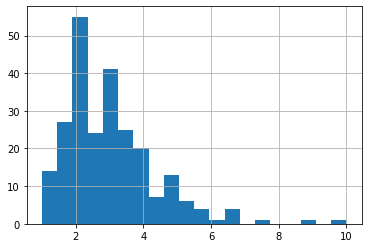

In [207]:
tips.tip.hist(bins = 20);
plt.show()

In [208]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [209]:
cts = tips.smoker.value_counts()

<AxesSubplot:>

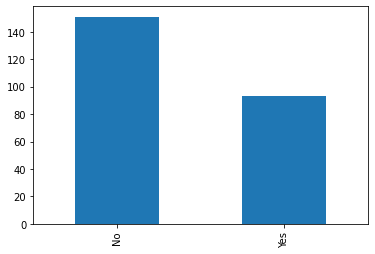

In [210]:
cts.plot(kind = 'bar')

In [211]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [212]:
tips['size'].value_counts() #(normalize=True).round(2)

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [213]:
cts = tips.sex.value_counts()

<AxesSubplot:>

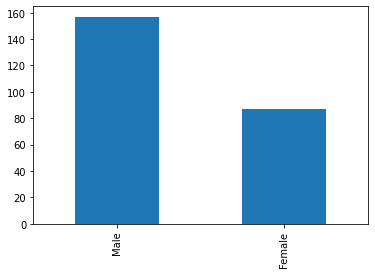

In [214]:
cts.plot(kind = 'bar')

<AxesSubplot:xlabel='sex', ylabel='count'>

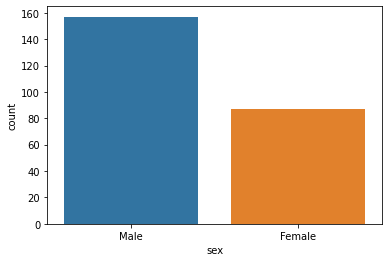

In [215]:
sns.countplot(x = 'sex', data = tips)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

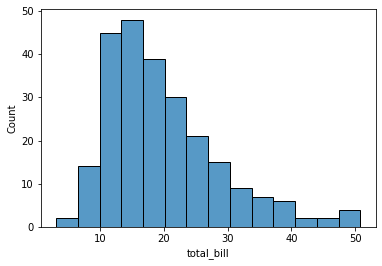

In [216]:
sns.histplot(tips.total_bill)

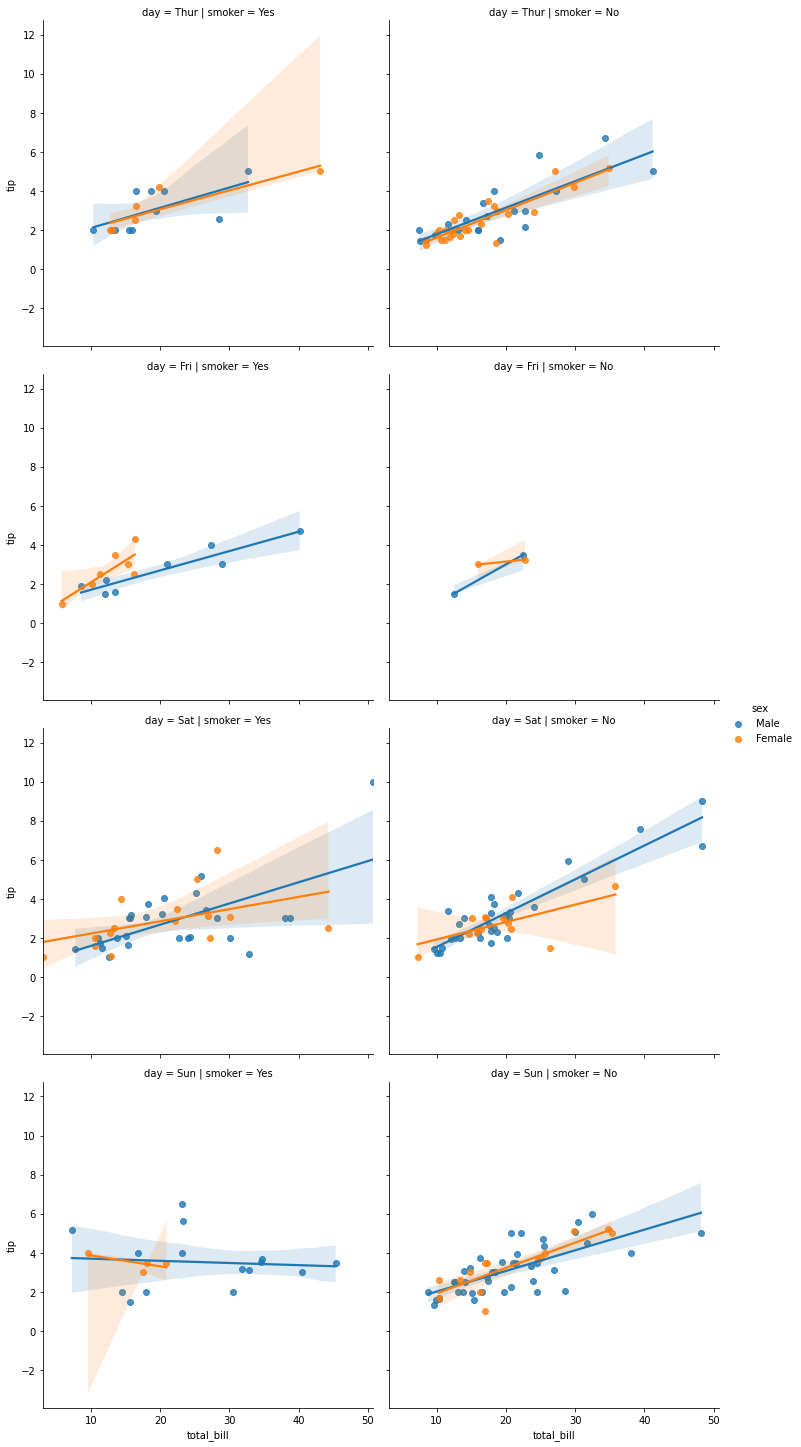

In [217]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', 
           col = 'smoker', row = 'day');

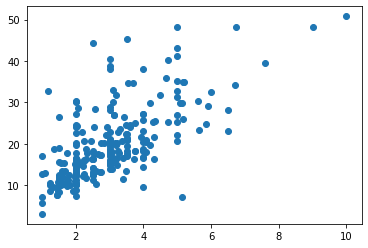

In [219]:
fig, (ax)= plt.subplots(1, 1)
ax.scatter(tips.tip, tips.total_bill)

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

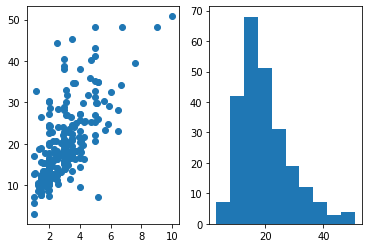

In [220]:
fig, (ax1, ax2)= plt.subplots(1, 2)
ax1.scatter(tips.tip, tips.total_bill)
ax2.hist(tips.total_bill)

/home/adri/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


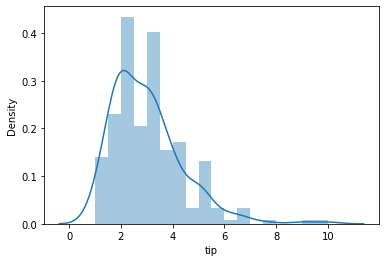

In [221]:
dis = sns.distplot(tips.tip)

/home/adri/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

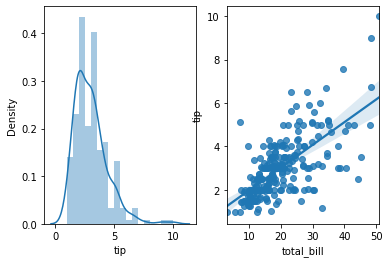

In [222]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(tips.tip, ax = ax1)
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax2)

In [223]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [238]:
tips['pct'] = (tips.tip/tips.total_bill*100).round(1)

In [239]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.9
1,10.34,1.66,Male,No,Sun,Dinner,3,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2,14.0
4,24.59,3.61,Female,No,Sun,Dinner,4,14.7


/home/adri/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


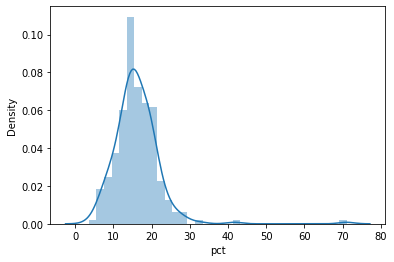

In [235]:
dis = sns.distplot(tips.pct)

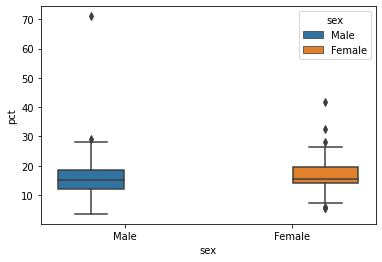

In [243]:
sns.boxplot(x = 'sex', y = 'pct', data = tips, hue = 'sex');

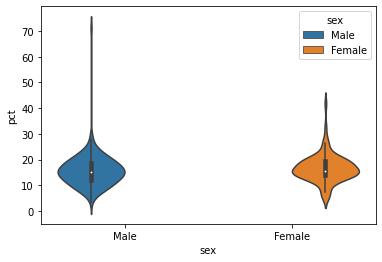

In [244]:
sns.violinplot(x = 'sex', y = 'pct', data = tips, hue = 'sex');

<AxesSubplot:xlabel='sex', ylabel='pct'>

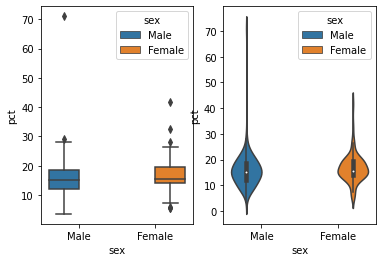

In [245]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(x = 'sex', y = 'pct', data = tips, hue = 'sex', ax = ax1)
sns.violinplot(x = 'sex', y = 'pct', data = tips, hue = 'sex', ax = ax2)

In [246]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.9
1,10.34,1.66,Male,No,Sun,Dinner,3,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2,14.0
4,24.59,3.61,Female,No,Sun,Dinner,4,14.7


In [248]:
#IV = smoker and sex
#DV = pct
#MANOVA


In [250]:
#2:39